In [73]:
import numpy as np
import xarray as xr
import matplotlib as mpl
#mpl.use('Agg') # Must be before importing matplotlib.pyplot or pylab!
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import glob
import os
#import seaborn as sns
import timeit
#start_time = timeit.default_timer()
from datetime import datetime,timedelta
from dask.diagnostics import ProgressBar
from functools import partial

In [2]:
ProgressBar().register()

In [3]:
#%% plot parameters
from matplotlib.gridspec import GridSpec
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally
plt.rc('font', family='serif',size = 18)  # controls default text layout
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize
plt.rc('figure', titlesize=18)  # fontsize of the figure title

#sns.set()

plt.rc('text', usetex=False)


In [4]:
def _subset_process_time(ds,var,iop):
    
    #subset for the variable(s)
    ds = ds[var]
    #ds['time'] = ds.time.dt.round('T')
    #IOP02
    if iop=='iop02': ds['time'] = pd.to_datetime('2019-08-22') + ds['time'].values
    #IOP03
    if iop=='iop03': ds['time'] = pd.to_datetime('2019-09-24') + ds['time'].values
    return(ds)

def _process_time(ds,iop):
    #round time to the nearest minute (30minute for PALM output)
    #ds['time'] = ds.time.dt.round('T')
    #IOP02
    if iop=='iop02':ds['time'] = pd.to_datetime('2019-08-22') + ds['time'].values
    #IOP03
    if iop=='iop03':ds['time'] = pd.to_datetime('2019-09-24') + ds['time'].values    
    return(ds)

#function to concatenate all files for an ensemble member and if needed read in all ensemble members
def open_concat_member_files(ensemble_numbers,file,iop):
    data_list = []
    #loop through ensemble members
    if np.size(ensemble_numbers) > 1:
        for member_num in ensemble_numbers:    

            start_time = timeit.default_timer()
            if iop=='iop02': source_folder = '/bog/incoming/cheesehead/palm/realistic_runs/ches_IOP2/ensemble.member.'+str(member_num) 
            #file = 'DATA_3D_AV_NETCDF_N02slice' 

            #Make a folder list and read in all the files from those folders. 
            folder_list = os.listdir(source_folder) 
            folder_list.sort() 
            file_list = [] 
            for folder in folder_list: 
                file_list.append(source_folder + '/' +folder+'/'+file) 
            file_list.sort()
            print(folder_list)

            #combine all the data along the time dimenstion 
            #don't combine them sequentially, but infer the sequence from coordinate values 
            #do this in parallel 
            #pull in only those values with a time dimension 
            var = ['w','theta','q','wtheta','wq']
            partial_func = partial(_subset_process_time, var=var,iop=iop)
            ds = xr.open_mfdataset(file_list,preprocess=partial_func) 
            ds.close() 
            print('Member',str(member_num),'finished collecting data')    
            #subset for time and day and collect into another list
            #for day1
            data_list.append(ds)
            elapsed = timeit.default_timer() - start_time
            print('Done with member',str(member_num),' Time elapsed ',elapsed, 'seconds')
        return(data_list)
            
    else:
        member_num =ensemble_numbers

        #loop through ensemble members
        start_time = timeit.default_timer()
        #IOP02
        if iop=='iop02':source_folder = '/bog/incoming/cheesehead/palm/realistic_runs/ches_IOP2/ensemble.member.'+str(member_num) 
        #IOP03
        if iop=='iop03':source_folder = '/bog/incoming/cheesehead/palm/realistic_runs/ches_IOP03/OUTPUT/ensemble.member.'+str(member_num) 
        
        #file = 'DATA_3D_AV_NETCDF_N03slice' 
        #file = 'DATA_1D_PR_NETCDF_N02slice' 

        #Make a folder list and read in all the files from those folders. 
        folder_list = os.listdir(source_folder) 
        folder_list.sort() 
        file_list = [] 
        for folder in folder_list: 
            file_list.append(source_folder + '/' +folder+'/'+file) 
        file_list.sort()
        print(folder_list)
        
        #combine all the data along the time dimenstion 
        partial_func = partial(_process_time,iop=iop)    
        ds = xr.open_mfdataset(file_list,preprocess=partial_func) 
        ds.close() 
        print('Member',str(member_num),'finished collecting data')    
        #subset for time and day and collect into another list
        #for day1
        #data_list.append(ds)
        elapsed = timeit.default_timer() - start_time
        print('Done with member',str(member_num),' Time elapsed ',elapsed, 'seconds')
        return(ds)


def remove_title_axes(ax):
    #removes title and axes labels for input axis
    ax2.set_title(" ")
    ax2.set_xlabel(" ")
    ax2.set_ylabel(" ")
    return(ax)


I want to check the continuous data from N03, near WLEF to see whether we find signals of structures as in the LiDAR data

Pull in the time series data from N03 mask, around the tall tower.

In [5]:
mask_lidar_ds_2_N03_iop02 = open_concat_member_files(2,'DATA_MASK_NETCDF_N03_M19slice','iop02')


['01.ches_IOP2.20255', '02.ches_IOP2.13449', '03.ches_IOP2.733', '04.ches_IOP2.18198', '05.ches_IOP2.19794', '06.ches_IOP2.11638', '07.ches_IOP02.31113']
Member 2 finished collecting data
Done with member 2  Time elapsed  1.0669309943914413 seconds


In [6]:
mask_lidar_ds_2_N03_iop02

<xarray.Dataset>
Dimensions:  (x: 17, time: 14040, y: 17, xu: 17, yv: 17, zu_3d: 62, zw_3d: 62)
Coordinates:
  * x        (x) float64 6.027e+03 6.033e+03 6.039e+03 ... 6.117e+03 6.123e+03
  * y        (y) float64 6.135e+03 6.141e+03 6.147e+03 ... 6.225e+03 6.231e+03
  * xu       (xu) float64 6.024e+03 6.03e+03 6.036e+03 ... 6.114e+03 6.12e+03
  * yv       (yv) float64 6.132e+03 6.138e+03 6.144e+03 ... 6.222e+03 6.228e+03
  * time     (time) datetime64[ns] 2019-08-22T05:00:09.600000175 ... 2019-08-...
  * zu_3d    (zu_3d) float64 0.0 2.0 6.0 10.0 14.0 ... 230.0 234.0 238.0 242.0
  * zw_3d    (zw_3d) float64 0.0 4.0 8.0 12.0 16.0 ... 232.0 236.0 240.0 244.0
Data variables: (12/19)
    E_UTM    (time, x) float64 dask.array<chunksize=(851, 17), meta=np.ndarray>
    N_UTM    (time, y) float64 dask.array<chunksize=(851, 17), meta=np.ndarray>
    Eu_UTM   (time, xu) float64 dask.array<chunksize=(851, 17), meta=np.ndarray>
    Nu_UTM   (time, y) float64 dask.array<chunksize=(851, 17), meta=np.ndarray>
    Ev_UTM   (time, x) float64 dask.array<chunksize=(851, 17), meta=np.ndarray>
    Nv_UTM   (time, yv) float64 dask.array<chunksize=(851, 17), meta=np.ndarray>
    ...       ...
    u        (time, zu_3d, y, xu) float32 dask.array<chunksize=(851, 62, 17, 17), meta=np.ndarray>
    v        (time, zu_3d, yv, x) float32 dask.array<chunksize=(851, 62, 17, 17), meta=np.ndarray>
    w        (time, zw_3d, y, x) float32 dask.array<chunksize=(851, 62, 17, 17), meta=np.ndarray>
    theta    (time, zu_3d, y, x) float32 dask.array<chunksize=(851, 62, 17, 17), meta=np.ndarray>
    q        (time, zu_3d, y, x) float32 dask.array<chunksize=(851, 62, 17, 17), meta=np.ndarray>
    s        (time, zu_3d, y, x) float32 dask.array<chunksize=(851, 62, 17, 17), meta=np.ndarray>
Attributes: (12/27)
    title:           PALM 21.10-rc.2  run: ches_IOP2.01  nest-id: 03  host: b...
    Conventions:     CF-1.7
    creation_time:   2022-08-16 02:54:38 -06
    data_content:    podsmasked
    version:         2
    origin_time:     2019-08-22 05:00:00 +00
    ...              ...
    source:          PALM 21.10-rc.2
    references:      
    keywords:        example, PALM-4U
    licence:         
    comment:         Generic crossing example
    VAR_LIST:        ;u;v;w;theta;q;s;

Just for a first order check, let's look at w,theta,q profiles near WLEF, a 5 minute averaged profile time series.

[########################################] | 100% Completed | 615.47 ms
[########################################] | 100% Completed | 720.29 ms


/tmp/ipykernel_2350690/2449798140.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(" ")
/tmp/ipykernel_2350690/2449798140.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(" ")


[########################################] | 100% Completed | 614.11 ms
[########################################] | 100% Completed | 618.98 ms


/tmp/ipykernel_2350690/2449798140.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(" ")


[########################################] | 100% Completed | 620.64 ms
[########################################] | 100% Completed | 614.56 ms


Text(0.5, 1.0, ' ')

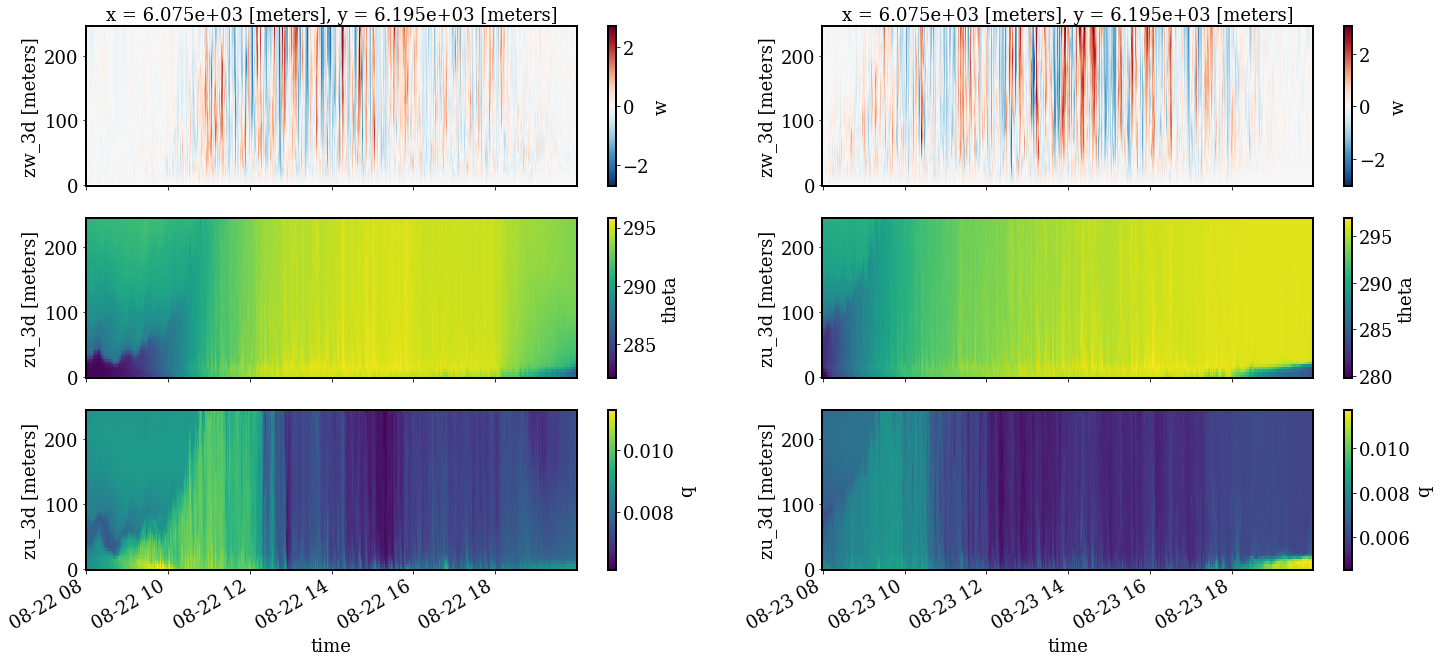

In [56]:

def remove_title_axes(ax):
    #removes title and axes labels for input axis
    ax.set_title(" ")
    ax.set_xlabel(" ")
    ax.set_xticklabels(" ")
    return(ax)

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(24.2,10),sharex=False, sharey=False)

var = 'w'
y_axis = 'zw_3d'
profile_0822 = mask_lidar_ds_2_N03_iop02[var].sel(time=slice('2019-08-22T08:00:09.600000175','2019-08-22T20:00:09.600000175'),x=6075,y=6195).resample(time='1T').mean()
profile_0822.plot(y=y_axis,ax=ax1)
profile_0823 = mask_lidar_ds_2_N03_iop02[var].sel(time=slice('2019-08-23T08:00:09.600000175','2019-08-23T20:00:09.600000175'),x=6075,y=6195).resample(time='1T').mean()
profile_0823.resample(time='1T').mean().plot(y=y_axis,ax=ax2)
ax1.set_xlabel(" ")
ax1.set_xticklabels(" ")
ax2.set_xlabel(" ")
ax2.set_xticklabels(" ")


var = 'theta'
y_axis = 'zu_3d'
profile_0822 = mask_lidar_ds_2_N03_iop02[var].sel(time=slice('2019-08-22T08:00:09.600000175','2019-08-22T20:00:09.600000175'),x=6075,y=6195)
profile_0822.resample(time='1T').mean().plot(y=y_axis,ax=ax3)
profile_0823 = mask_lidar_ds_2_N03_iop02[var].sel(time=slice('2019-08-23T08:00:09.600000175','2019-08-23T20:00:09.600000175'),x=6075,y=6195)
profile_0823.resample(time='1T').mean().plot(y=y_axis,ax=ax4)
remove_title_axes(ax3)
remove_title_axes(ax4)

var = 'q'
y_axis = 'zu_3d'
profile_0822 = mask_lidar_ds_2_N03_iop02[var].sel(time=slice('2019-08-22T08:00:09.600000175','2019-08-22T20:00:09.600000175'),x=6075,y=6195)
profile_0822.resample(time='1T').mean().plot(y=y_axis,ax=ax5)
profile_0823 = mask_lidar_ds_2_N03_iop02[var].sel(time=slice('2019-08-23T08:00:09.600000175','2019-08-23T20:00:09.600000175'),x=6075,y=6195)
profile_0823.resample(time='1T').mean().plot(y=y_axis,ax=ax6)
ax5.set_title(" ")
ax6.set_title(" ")



Not sure if the theta and q profiles really show anything. But we can see the structures in the w profiles. 

In [9]:
mask_lidar_ds_2_N03_iop03 = open_concat_member_files(2,'DATA_MASK_NETCDF_N03_M19slice','iop03')


['01.ches_IOP3.12306', '02.ches_IOP3.222', '03.ches_IOP3.5376', '04.ches_IOP3.29351', '05.ches_IOP3.16098', '06.ches_IOP3.2624', '07.ches_IOP3.22013']
[########################################] | 100% Completed | 101.68 ms
[########################################] | 100% Completed | 101.34 ms
[########################################] | 100% Completed | 102.86 ms
[########################################] | 100% Completed | 101.35 ms
[########################################] | 100% Completed | 101.40 ms
[########################################] | 100% Completed | 101.35 ms
[########################################] | 100% Completed | 101.40 ms
[########################################] | 100% Completed | 101.35 ms
[########################################] | 100% Completed | 101.65 ms
[########################################] | 100% Completed | 101.31 ms
[########################################] | 100% Completed | 101.45 ms
[########################################] | 100% Complet

In [10]:
mask_lidar_ds_2_N03_iop03

<xarray.Dataset>
Dimensions:  (time: 12452, x: 17, y: 17, xu: 17, yv: 17, zu_3d: 62, zw_3d: 62)
Coordinates:
  * time     (time) datetime64[ns] 2019-09-24T05:00:09.600000175 ... 2019-09-...
  * x        (x) float64 6.027e+03 6.033e+03 6.039e+03 ... 6.117e+03 6.123e+03
  * y        (y) float64 6.135e+03 6.141e+03 6.147e+03 ... 6.225e+03 6.231e+03
  * xu       (xu) float64 6.024e+03 6.03e+03 6.036e+03 ... 6.114e+03 6.12e+03
  * yv       (yv) float64 6.132e+03 6.138e+03 6.144e+03 ... 6.222e+03 6.228e+03
  * zu_3d    (zu_3d) float64 0.0 2.0 6.0 10.0 14.0 ... 230.0 234.0 238.0 242.0
  * zw_3d    (zw_3d) float64 0.0 4.0 8.0 12.0 16.0 ... 232.0 236.0 240.0 244.0
Data variables: (12/19)
    E_UTM    (time, x) float64 dask.array<chunksize=(4853, 17), meta=np.ndarray>
    N_UTM    (time, y) float64 dask.array<chunksize=(4853, 17), meta=np.ndarray>
    Eu_UTM   (time, xu) float64 dask.array<chunksize=(4853, 17), meta=np.ndarray>
    Nu_UTM   (time, y) float64 dask.array<chunksize=(4853, 17), meta=np.ndarray>
    Ev_UTM   (time, x) float64 dask.array<chunksize=(4853, 17), meta=np.ndarray>
    Nv_UTM   (time, yv) float64 dask.array<chunksize=(4853, 17), meta=np.ndarray>
    ...       ...
    u        (time, zu_3d, y, xu) float32 dask.array<chunksize=(4853, 62, 17, 17), meta=np.ndarray>
    v        (time, zu_3d, yv, x) float32 dask.array<chunksize=(4853, 62, 17, 17), meta=np.ndarray>
    w        (time, zw_3d, y, x) float32 dask.array<chunksize=(4853, 62, 17, 17), meta=np.ndarray>
    theta    (time, zu_3d, y, x) float32 dask.array<chunksize=(4853, 62, 17, 17), meta=np.ndarray>
    q        (time, zu_3d, y, x) float32 dask.array<chunksize=(4853, 62, 17, 17), meta=np.ndarray>
    s        (time, zu_3d, y, x) float32 dask.array<chunksize=(2592, 62, 17, 17), meta=np.ndarray>
Attributes: (12/27)
    title:           PALM 21.10-rc.2  run: ches_IOP3.02  nest-id: 03  host: b...
    Conventions:     CF-1.7
    creation_time:   2022-02-24 08:11:08 -07
    data_content:    podsmasked
    version:         3
    origin_time:     2019-09-24 05:00:00 +00
    ...              ...
    source:          PALM 21.10-rc.2
    references:      
    keywords:        example, PALM-4U
    licence:         
    comment:         Generic crossing example
    VAR_LIST:        ;u;v;w;theta;q;s;

[########################################] | 100% Completed | 1.02 sms
[########################################] | 100% Completed | 1.52 ss


/tmp/ipykernel_2350690/1774038128.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(" ")
/tmp/ipykernel_2350690/1774038128.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(" ")


[########################################] | 100% Completed | 1.12 sms
[########################################] | 100% Completed | 1.53 ss


/tmp/ipykernel_2350690/1774038128.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(" ")


[########################################] | 100% Completed | 1.12 sms
[########################################] | 100% Completed | 1.52 ss


Text(0.5, 1.0, ' ')

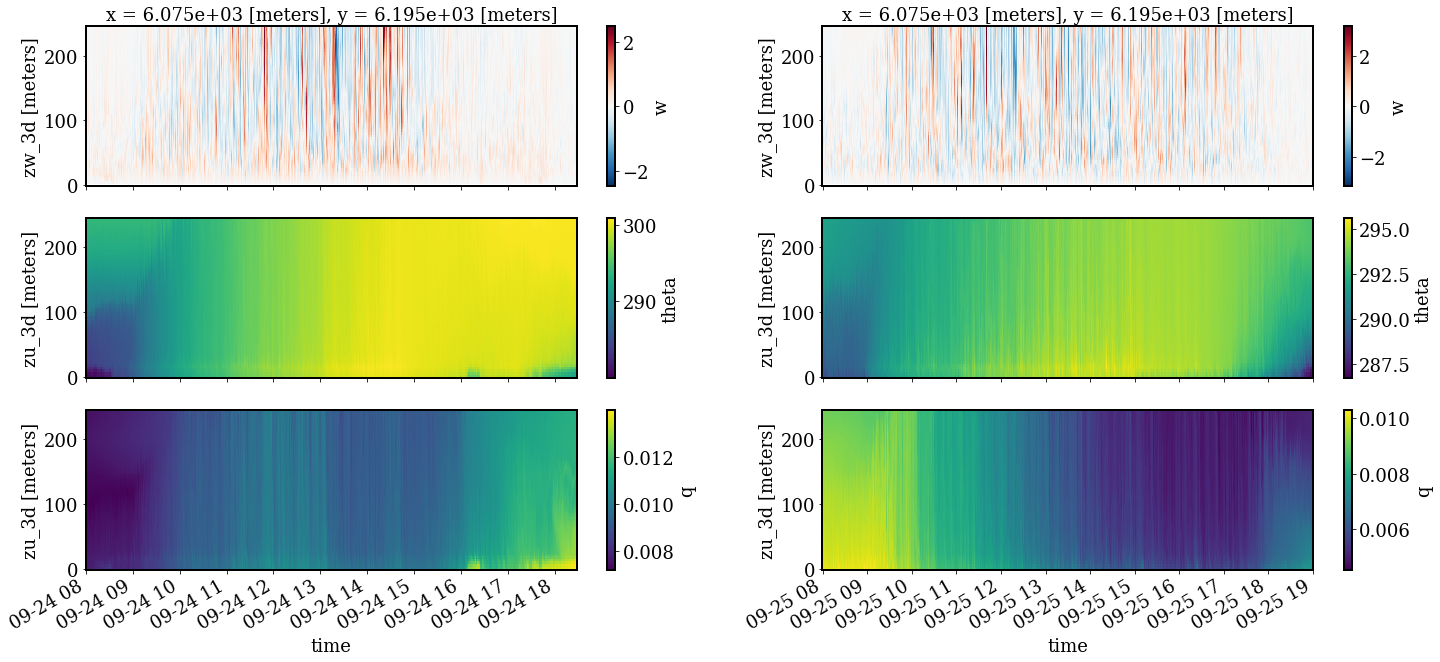

In [59]:

def remove_title_axes(ax):
    #removes title and axes labels for input axis
    ax.set_title(" ")
    ax.set_xlabel(" ")
    ax.set_xticklabels(" ")
    return(ax)

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(24.2,10),sharex=False, sharey=False)


var = 'w'
y_axis = 'zw_3d'

profile_0924 = mask_lidar_ds_2_N03_iop03[var].sel(time=slice('2019-09-24T08:00:09.600000175','2019-09-24T20:00:09.600000175'),x=6075,y=6195)
profile_0924.resample(time='1T').mean().plot(y=y_axis,ax=ax1)
profile_0925 = mask_lidar_ds_2_N03_iop03[var].sel(time=slice('2019-09-25T08:00:09.600000175','2019-09-25T20:00:09.600000175'),x=6075,y=6195)
profile_0925.resample(time='1T').mean().plot(y=y_axis,ax=ax2)
ax1.set_xlabel(" ")
ax1.set_xticklabels(" ")
ax2.set_xlabel(" ")
ax2.set_xticklabels(" ")

var = 'theta'
y_axis = 'zu_3d'
profile_0924 = mask_lidar_ds_2_N03_iop03[var].sel(time=slice('2019-09-24T08:00:09.600000175','2019-09-24T20:00:09.600000175'),x=6075,y=6195)
profile_0924.resample(time='1T').mean().plot(y=y_axis,ax=ax3)
profile_0925 = mask_lidar_ds_2_N03_iop03[var].sel(time=slice('2019-09-25T08:00:09.600000175','2019-09-25T20:00:09.600000175'),x=6075,y=6195)
profile_0925.resample(time='1T').mean().plot(y=y_axis,ax=ax4)
remove_title_axes(ax3)
remove_title_axes(ax4)

var = 'q'
y_axis = 'zu_3d'
profile_0924 = mask_lidar_ds_2_N03_iop03[var].sel(time=slice('2019-09-24T08:00:09.600000175','2019-09-24T20:00:09.600000175'),x=6075,y=6195)
profile_0924.resample(time='1T').mean().plot(y=y_axis,ax=ax5)
profile_0925 = mask_lidar_ds_2_N03_iop03[var].sel(time=slice('2019-09-25T08:00:09.600000175','2019-09-25T20:00:09.600000175'),x=6075,y=6195)
profile_0925.resample(time='1T').mean().plot(y=y_axis,ax=ax6)
ax5.set_title(" ")
ax6.set_title(" ")


In [68]:
ensemble_member_ds_2_N02 = open_concat_member_files(2,'DATA_3D_NETCDF_N02slice','iop03')
ensemble_member_ds_2_N02_av = open_concat_member_files(2,'DATA_3D_AV_NETCDF_N02slice','iop03')


['01.ches_IOP3.12306', '02.ches_IOP3.222', '03.ches_IOP3.5376', '04.ches_IOP3.29351', '05.ches_IOP3.16098', '06.ches_IOP3.2624', '07.ches_IOP3.22013']
Member 2 finished collecting data
Done with member 2  Time elapsed  0.25069083645939827 seconds
['01.ches_IOP3.12306', '02.ches_IOP3.222', '03.ches_IOP3.5376', '04.ches_IOP3.29351', '05.ches_IOP3.16098', '06.ches_IOP3.2624', '07.ches_IOP3.22013']
Member 2 finished collecting data
Done with member 2  Time elapsed  0.28113939613103867 seconds


[########################################] | 100% Completed | 102.40 ms


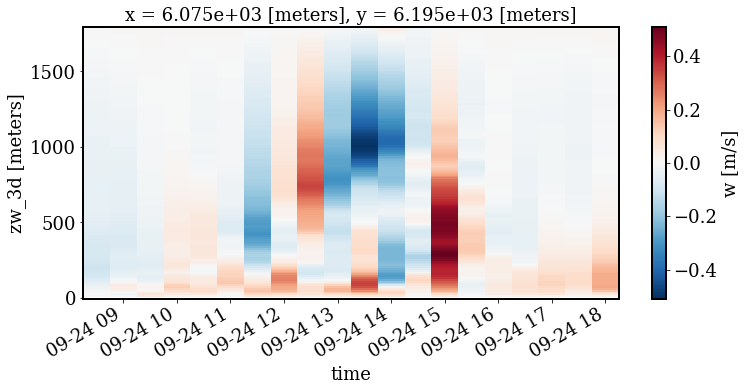

In [67]:
var = 'w'
y_axis = 'zw_3d'
ensemble_member_ds_2_N02_av[var].sel(time=slice('2019-09-24T08:00:09.600000175','2019-09-24T20:00:09.600000175'),x=6075,y=6195).plot(y=y_axis,figsize=(12,5))

[########################################] | 100% Completed | 95.38 s


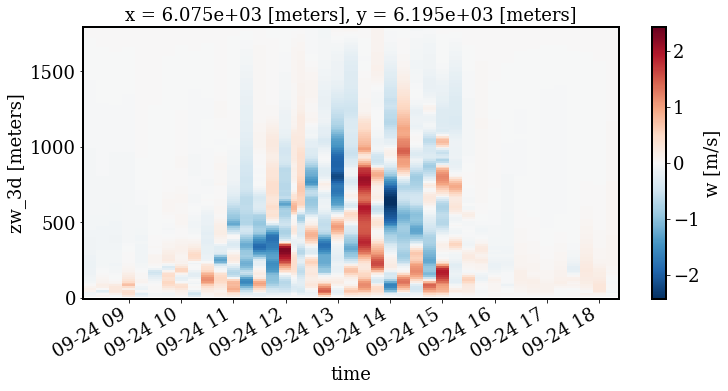

In [69]:
var = 'w'
y_axis = 'zw_3d'
ensemble_member_ds_2_N02[var].sel(time=slice('2019-09-24T08:00:09.600000175','2019-09-24T20:00:09.600000175'),x=6075,y=6195).plot(y=y_axis,figsize=(12,5))

I'll continue with reading in the lidar data. I think I should write a python code to read the file and convert it to netcdf files


In [128]:
# Set the directory containing the ASCII files
folder_path = '/bog/incoming/CHEESEHEAD/Wind_LiDAR_KIT/20190822/'

def append_data():
    #gate.append(line.split()[0])
    velocity.append(line.split()[1])
    snr.append(line.split()[2])
    beta.append(line.split()[3])

def append_metadata():
    time.append(line.split()[0])
    azimuth.append(line.split()[1])
    elevation.append(line.split()[2])
    pitch.append(line.split()[3])
    roll.append(line.split()[4])


for file in os.listdir(folder_path):

    if file.startswith('Stare'):    
        # Loop through all the files
        
        file_path = folder_path + file
        skiplines = 17
        #initialize empty lists for extracting data
        time = []
        azimuth = []
        elevation = []
        pitch = []
        roll = []
        
        #gate = []
        velocity = []
        snr = []
        beta = []
        
        with open(file_path, 'r') as f:
            for i, line in enumerate(f):        
                #skiplines 
                if i < skiplines: continue

                #append the first line to metadata lists
                if i == skiplines:
                    append_metadata()            
                    #go to the next iteration
                    continue

                #append the rest to data lists and continue
                if i < 185:
                    append_data()
                    continue        

                if (i-17) % 168==0 : 
                    append_metadata()            
                    #go to the next iteration
                    continue

                if (i-17) % 168!=0 : 
                    append_data()            
                    #go to the next iteration
                    continue

        velocity_reshaped = (np.split(np.asarray(velocity).astype(float), np.shape(time)[0]))
        snr_reshaped = (np.split(np.asarray(snr).astype(float), np.shape(time)[0]))
        beta_reshaped = (np.split(np.asarray(beta).astype(float), np.shape(time)[0]))
        gate = np.arange(0,167)
        #altitude = (gate + 0.5) * Gate length
        altitude = (gate + 0.5) * 18

        #np.shape(np.split(np.asarray(velocity), 4231))
        # Create a xarray dataset from the lists
        ds = xr.Dataset(
            {
                'velocity': (['time','gate'], velocity_reshaped),
                'snr': (['time','gate'], snr_reshaped),
                'beta': (['time','gate'], beta_reshaped),
            },
            coords={
                'time': pd.to_datetime(np.asarray(time).astype(float), unit='h',origin=pd.Timestamp('2019-08-22')),
                'gate': gate,
                'altitude': altitude,
                'roll': np.asarray(roll).astype(float)
            },

            # define global attributes
            attrs = {'creation_date':str(pd.to_datetime(datetime.now()).round('T')), 
                 'azimuth':azimuth[0], 
                 'elevation':elevation[0],
                 'pitch':pitch[0]},
        )
        
        #write the dataset as .nc file
        ds.sortby('time')
        outfile_path = folder_path + file[:-4]+'.nc'
        ds.to_netcdf(outfile_path,mode='w')#change mode='a' if overwriting
        print('Done with '+file+' !')
        
        


Done with Stare_74_20190822_00.hpl !
Done with Stare_74_20190822_01.hpl !
Done with Stare_74_20190822_02.hpl !
Done with Stare_74_20190822_03.hpl !
Done with Stare_74_20190822_04.hpl !
Done with Stare_74_20190822_05.hpl !
Done with Stare_74_20190822_06.hpl !
Done with Stare_74_20190822_07.hpl !
Done with Stare_74_20190822_08.hpl !
Done with Stare_74_20190822_09.hpl !
Done with Stare_74_20190822_10.hpl !
Done with Stare_74_20190822_11.hpl !
Done with Stare_74_20190822_12.hpl !
Done with Stare_74_20190822_13.hpl !
Done with Stare_74_20190822_14.hpl !
Done with Stare_74_20190822_15.hpl !
Done with Stare_74_20190822_16.hpl !
Done with Stare_74_20190822_17.hpl !
Done with Stare_74_20190822_18.hpl !
Done with Stare_74_20190822_19.hpl !
Done with Stare_74_20190822_20.hpl !
Done with Stare_74_20190822_21.hpl !
Done with Stare_74_20190822_22.hpl !
Done with Stare_74_20190822_23.hpl !


In [ ]:
# file = 'Stare_74_20190822_13.hpl'
# file_path = folder_path + file
# skiplines = 17
# time = []
# azimuth = []
# elevation = []
# pitch = []
# roll = []

# #gate = []
# velocity = []
# snr = []
# beta = []

# with open(file_path, 'r') as f:
#     for i, line in enumerate(f):        
#         #skiplines 
#         if i < skiplines: continue

#         #append the first line to metadata lists
#         if i == skiplines:
#             append_metadata()            
#             #go to the next iteration
#             continue

#         #append the rest to data lists and continue
#         if i < 185:
#             append_data()
#             continue        

#         if (i-17) % 168==0 : 
#             append_metadata()            
#             #go to the next iteration
#             continue

#         if (i-17) % 168!=0 : 
#             append_data()            
#             #go to the next iteration
#             continue

# velocity_reshaped = (np.split(np.asarray(velocity).astype(float), np.shape(time)[0]))
# snr_reshaped = (np.split(np.asarray(snr).astype(float), np.shape(time)[0]))
# beta_reshaped = (np.split(np.asarray(beta).astype(float), np.shape(time)[0]))
# gate = np.arange(0,167)
# #altitude = (gate + 0.5) * Gate length
# altitude = (gate + 0.5) * 18

# #np.shape(np.split(np.asarray(velocity), 4231))
# # Create a xarray dataset from the lists
# ds = xr.Dataset(
#     {
#         'velocity': (['time','gate'], velocity_reshaped),
#         'snr': (['time','gate'], snr_reshaped),
#         'beta': (['time','gate'], beta_reshaped),
#     },
#     coords={
#         'time': pd.to_datetime(np.asarray(time).astype(float), unit='h',origin=pd.Timestamp('2019-08-22')),
#         'gate': gate,
#         'altitude': altitude,
#         'roll': np.asarray(roll).astype(float)
#     },

#     # define global attributes
#     attrs = {'creation_date':str(pd.to_datetime(datetime.now()).round('T')), 
#          'azimuth':azimuth[0], 
#          'elevation':elevation[0],
#          'pitch':pitch[0]},
# )

# #write the dataset as .nc file
# ds.sortby('time')



In [145]:
ds_list = []
file_list = []
for file in os.listdir(folder_path):
    if file.endswith('.nc'):
        ds = xr.open_dataset(folder_path+file)
        ds = ds.drop_dims('roll')
        ds_list.append(ds)
        ds.close()
        file_list.append(file)        
        
file_list.sort()


#lidar_ds = xr.open_mfdataset(file_list,concat_dim='time',combine='nested') 


In [146]:
ds_list

[<xarray.Dataset>
 Dimensions:   (time: 4231, gate: 167, altitude: 167)
 Coordinates:
   * time      (time) datetime64[ns] 2019-08-22T00:00:45.259992064 ... 2019-08...
   * gate      (gate) int64 0 1 2 3 4 5 6 7 8 ... 159 160 161 162 163 164 165 166
   * altitude  (altitude) float64 9.0 27.0 45.0 ... 2.961e+03 2.979e+03 2.997e+03
 Data variables:
     velocity  (time, gate) float64 ...
     snr       (time, gate) float64 ...
     beta      (time, gate) float64 ...
 Attributes:
     creation_date:  2023-02-19 21:43:00
     azimuth:        333.00
     elevation:      77.64
     pitch:          -0.01,
 <xarray.Dataset>
 Dimensions:   (time: 4246, gate: 167, altitude: 167)
 Coordinates:
   * time      (time) datetime64[ns] 2019-08-22T01:00:45.090000128 ... 2019-08...
   * gate      (gate) int64 0 1 2 3 4 5 6 7 8 ... 159 160 161 162 163 164 165 166
   * altitude  (altitude) float64 9.0 27.0 45.0 ... 2.961e+03 2.979e+03 2.997e+03
 Data variables:
     velocity  (time, gate) float64 ...
     

In [151]:
lidar_ds = xr.concat(ds_list,dim='time').sortby('time')
lidar_ds

<xarray.Dataset>
Dimensions:   (time: 101599, gate: 167, altitude: 167)
Coordinates:
  * time      (time) datetime64[ns] 2019-08-22T00:00:45.259992064 ... 2019-08...
  * gate      (gate) int64 0 1 2 3 4 5 6 7 8 ... 159 160 161 162 163 164 165 166
  * altitude  (altitude) float64 9.0 27.0 45.0 ... 2.961e+03 2.979e+03 2.997e+03
Data variables:
    velocity  (time, gate) float64 4.589 4.933 -2.1 ... -1.718 -0.8386 -1.45
    snr       (time, gate) float64 1.013 1.02 1.017 1.012 ... 1.004 1.009 1.015
    beta      (time, gate) float64 7.314e-07 1.11e-06 ... 2.537e-06 4.101e-06
Attributes:
    creation_date:  2023-02-19 21:43:00
    azimuth:        333.00
    elevation:      77.64
    pitch:          -0.01

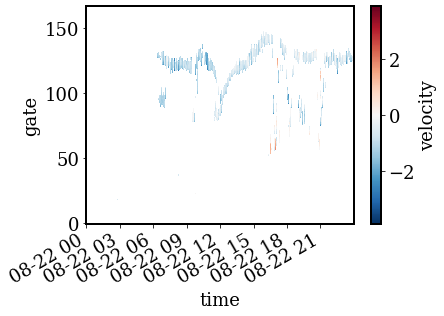

In [157]:
lidar_ds.sel(altitude=slice(0,261)).where(lidar_ds.snr > 1.2).velocity.resample(time='1T').mean().plot(y='gate')

In [161]:
lidar_ds.where(lidar_ds.snr > 1.1).velocity.isel(gate=slice(0,))resample(time='1T').mean().plot(y='gate')

(array([5.6220000e+03, 5.3313000e+04, 3.2309900e+05, 8.2920100e+05,
        3.5655256e+07, 7.0905000e+04, 3.2173470e+06, 3.8290000e+03,
        9.8900000e+02, 5.9900000e+02]),
 array([-2.85571127, -2.22936428, -1.6030173 , -0.97667032, -0.35032333,
         0.27602365,  0.90237064,  1.52871762,  2.1550646 ,  2.78141159,
         3.40775857]),
 <BarContainer object of 10 artists>)

ConversionError: Failed to convert value(s) to axis units: 'gate'

<Figure size 432x288 with 1 Axes>